In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from utils.subsampled_imagenet import SubsampledImageNet
from utils.visualization import visualization_preprocess, image_grid
import tqdm
import os.path
import json

In [132]:
# Parameters
top_k = 25
datapath = "/datasets/ilsvrc/"
mlp_layer = 9
model = "ViT-B-32"
pretrained = "openai"
input_dir = "./output_dir/"
output_dir = './output_dir/'
descriptions = '30k'
sparse_size = 128

In [10]:
# Loading data
ds_vis = SubsampledImageNet(root=datapath, split='train', transform=visualization_preprocess)

neurons = np.load(
    os.path.join(
        input_dir, f"imagenet_train_mlps_{model}_{pretrained}_{mlp_layer}_merged.npy"
    ),
    mmap_mode="r",
)

with open(os.path.join(output_dir, f'imagenet_mlps_{model}_{pretrained}_{mlp_layer}_{descriptions}_decomposition_omp_1.0_{sparse_size}.json'), 'r') as w:
    sparse_dict = json.load(w)


In [5]:
# Finding significant neurons
neurons_mean = neurons.mean(axis=0)
importants = []
for neuron in tqdm.trange(neurons.shape[1]):
    current_neurons = neurons[:, neuron] - neurons_mean[neuron]
    important = np.argsort(np.linalg.norm(current_neurons, axis=-1))[-top_k:]
    importants.append(important)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3072/3072 [00:14<00:00, 205.06it/s]


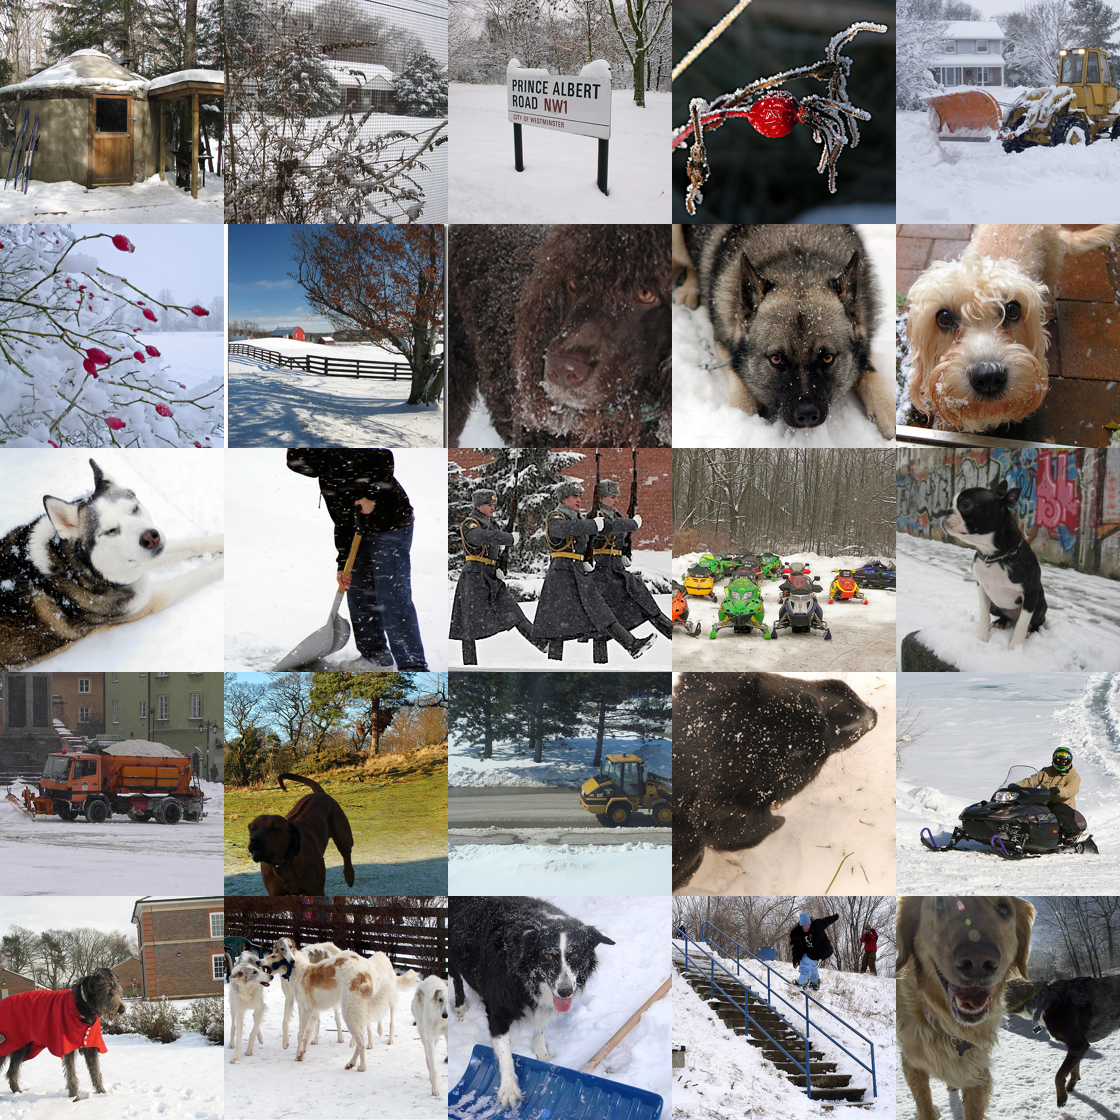

In [133]:
# Visualization
neuron_to_present = 4 


important = importants[neuron_to_present]
images = []
for i in important:
    images.append(ds_vis[i][0])

image_grid(images[::-1], rows=int(np.sqrt(top_k)), cols=int(np.sqrt(top_k)))

In [129]:
sorted_values = sorted([(i[1], i[2].strip()) for i in sparse_dict[str(neuron_to_present)]])
for i in sorted_values[::-1]:
    print(i)

(0.019052661955356598, 'yacht')
(0.012534628622233868, 'cabriolet')
(0.009561654180288315, 'maybach')
(-0.005893980618566275, 'hopper')
